In [2]:
import pandas as pd
import numpy as np

In [15]:
from ggplot import *

%matplotlib inline

In [3]:
# Import data
filename='./turnstile_data_master_with_weather.csv'

turnstile_weather=pd.read_csv(filename)

In [4]:
# view df
turnstile_weather.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


In [8]:
turnstile_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131951 entries, 0 to 131950
Data columns (total 22 columns):
Unnamed: 0         131951 non-null int64
UNIT               131951 non-null object
DATEn              131951 non-null object
TIMEn              131951 non-null object
Hour               131951 non-null int64
DESCn              131951 non-null object
ENTRIESn_hourly    131951 non-null float64
EXITSn_hourly      131951 non-null float64
maxpressurei       131951 non-null float64
maxdewpti          131951 non-null float64
mindewpti          131951 non-null float64
minpressurei       131951 non-null float64
meandewpti         131951 non-null float64
meanpressurei      131951 non-null float64
fog                131951 non-null float64
rain               131951 non-null float64
meanwindspdi       131951 non-null float64
mintempi           131951 non-null float64
meantempi          131951 non-null float64
maxtempi           131951 non-null float64
precipi            131951 non-null fl

In [ ]:
# Remove unnessasary columns
turnstile_weather.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
# Calculate the total number of commuters using the unit within the month
daily_commutors=turnstile_weather.groupby(['UNIT'])['ENTRIESn_hourly','EXITSn_hourly'].sum()

In [20]:
daily_commutors.reset_index(inplace=True)
daily_commutors.head()

,UNIT,ENTRIESn_hourly,EXITSn_hourly
0,R001,749682.0,708638.0
1,R002,176535.0,156816.0
2,R003,35938.0,25333.0
3,R004,93104.0,70732.0
4,R005,91031.0,71279.0


ValueError: First argument must be a sequence

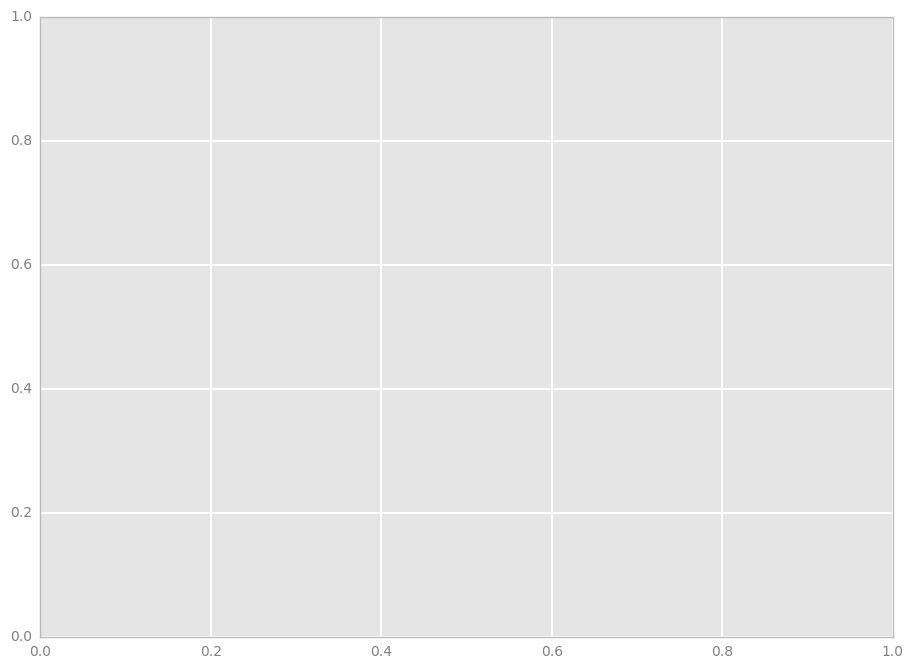

In [21]:
ggplot(daily_commutors,aes('UNIT','ENTRIESn_hourly'))+geom_point(aes(color='r'))